# Hypothesis Testing

In [2]:
#Import Libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

50.20709907226372
51.2246367872868
50.142376403858236


/var/folders/6t/1_v9ync132lgs0k2f0d3t9mc0000gn/T/ipykernel_78147/444310000.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([population, sample1, sample2], labels=['Population','Sample 1','Sample 2'])


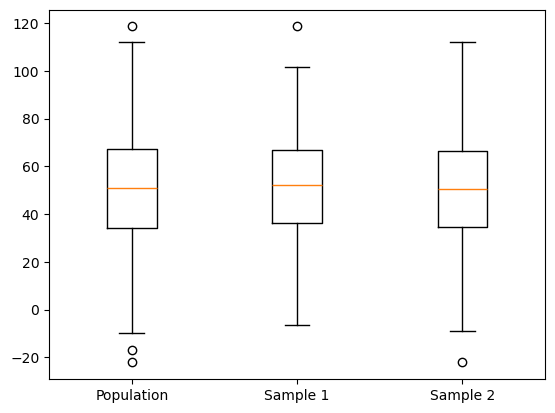

In [3]:
#np.random.seed(1663)  # Set seed to allow replication of random data

#Generate population data and samples from population
population = np.random.normal(50, 25, 500)
sample1 = np.random.choice(population, 100)
sample2 = np.random.choice(population, 100)
print(np.mean(population))
print(np.mean(sample1))
print(np.mean(sample2))
plt.boxplot([population, sample1, sample2], labels=['Population','Sample 1','Sample 2'])
plt.show()

In [4]:
#One Sample Two-Tailed Z Test - Comparing a sample mean to a population mean
#Use Z test if sample size is > 30 and population standard deviation is known
#Z = (Sample Mean - Population Mean) / (Population Standard Deviation / SquareRoot(n))
z = (np.mean(sample1) - np.mean(population)) / (np.std(population) / np.sqrt(len(sample1)))
cv1tL = stats.norm.ppf(0.05)  #stats.norm.ppf(alpha) gives us our critical value for a one tailed Z test for left tails
cv1tR = stats.norm.ppf(1-0.05)  #stats.norm.ppf(1-alpha) gives us our critical value for a one tailed Z test for right tails
cv2t = abs(stats.norm.ppf(0.05/2)) #stats.norm.ppf(alpha/2) gives us our critical value for a two tailed Z test 
print(f'CV for 1TL is {cv1tL}')
print(f'CV for 1TR is {cv1tR}')
print(f'CV for 2T is {cv2t}')
print(f'Z is equal to {z}')
print('Reject the null hypothesis that the sample mean is equal to the population mean?')
print(z > abs(cv2t))

CV for 1TL is -1.6448536269514729
CV for 1TR is 1.644853626951472
CV for 2T is 1.9599639845400545
Z is equal to 0.4178420722036587
Reject the null hypothesis that the sample mean is equal to the population mean?
False


In [5]:
#Two Sample Two-Tailed Z Test - Comparing two sample means
#If (mean1 = mean2) then (mean1 - mean2 = 0)
print(np.mean(sample1))
print(np.mean(sample2))
zn = np.mean(sample1) - np.mean(sample2) - 0
zd = np.sqrt(((np.var(sample1) / len(sample1)) + (np.var(sample2) / len(sample2))))
z = zn / zd
print(z)
cv = stats.norm.ppf(0.05)
print(cv)
print("Reject the null?")
print(abs(z) > abs(cv))

51.2246367872868
50.142376403858236
0.3070207826793744
-1.6448536269514729
Reject the null?
False


In [6]:
#Creating a function to conduct a two-sample Z test
def ztester2sample(sample1, sample2, diff, alpha):
    numerator = np.mean(sample1) - np.mean(sample2) - diff
    denominator = np.sqrt((np.var(sample1) / len(sample1)) + (np.var(sample2) / len(sample2)))
    z = numerator / denominator
    cv = stats.norm.ppf(alpha)
    absz = abs(z)
    abscv = abs(cv)
    print("Reject the null?")
    print(absz > abscv)

ztester2sample(sample1, sample2, 0, 0.05)  # Calling our function

Reject the null?
False


/var/folders/6t/1_v9ync132lgs0k2f0d3t9mc0000gn/T/ipykernel_78147/2379425225.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pop, s20], labels=['Population','Sample 20'])


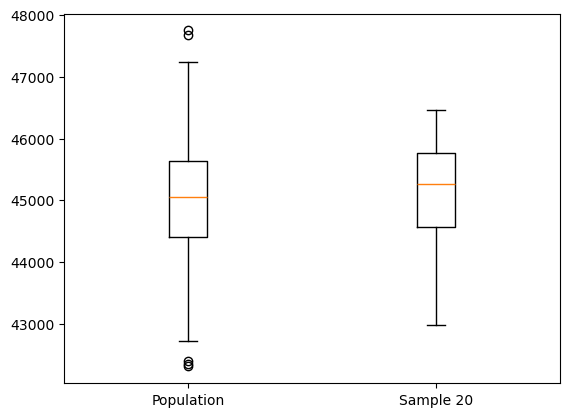

45024.45049321785
45177.53310507133
TtestResult(statistic=0.7434303956641072, pvalue=0.4663154475111235, df=19)


In [7]:
##########T - TESTING - TIME##########
#One Sample T-Test
pop = np.random.normal(45000, 900, 1000)  #Population data
s20 = np.random.choice(pop, 20)  #Sample 20 members of pop
plt.boxplot([pop, s20], labels=['Population','Sample 20'])
plt.show()
print(np.mean(pop))  #Population mean
print(np.mean(s20))  #Small sample mean
res20 = stats.ttest_1samp(s20, np.mean(pop))  #stats.ttest_1samp(SAMPLE DATA, POPULATION MEAN)
print(res20)  #Test results

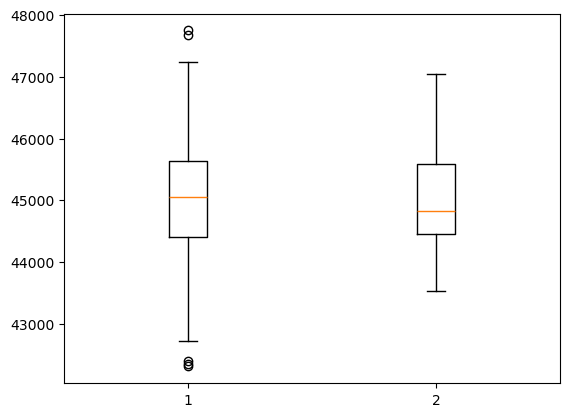

45040.573859573306
TtestResult(statistic=0.13331303294354505, pvalue=0.8944918265633548, df=49)


In [9]:
s50 = np.random.choice(pop, 50)
plt.boxplot([pop, s50])
plt.show()
print(np.mean(s50))  
res50 = stats.ttest_1samp(s50, np.mean(pop))
print(res50)  #Results

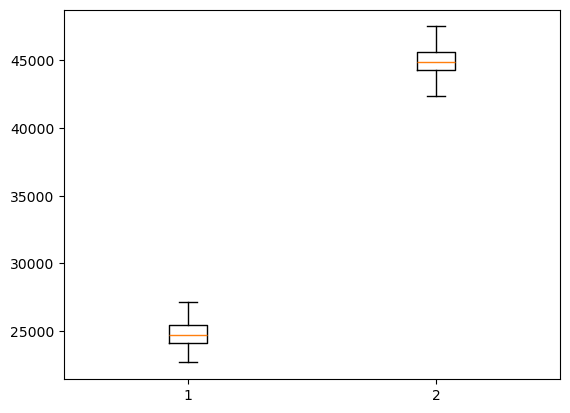

24726.651177872376
44969.25519635522
TtestResult(statistic=-141.11695550454428, pvalue=1.2105406559879889e-200, df=198.0)


In [16]:
#Two Sample T-Test
#Generate fake data from a normal distribution, 20k difference
v1 = np.random.normal(25000, 1000, 100)
v2 = np.random.normal(45000, 1000, 100)
plt.boxplot([v1, v2])
plt.show()
#Means
print(np.mean(v1))
print(np.mean(v2))
#Run a "two-sample t-test" to assess the difference in means between two samples
t1 = stats.ttest_ind(v1, v2)
print(t1)  # If p < 2.2e-16, we reject the null with extreme confidence

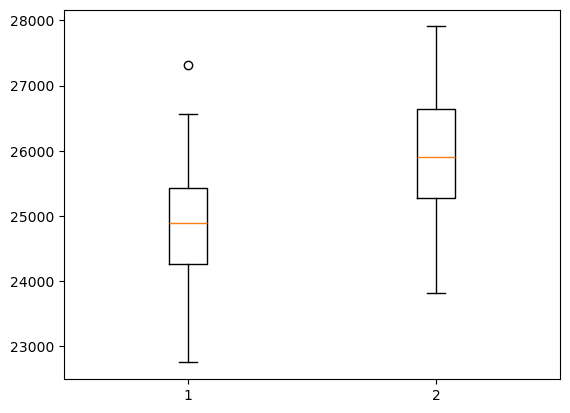

24836.46425878725
25940.929310753243
TtestResult(statistic=-8.839310441706377, pvalue=5.259413118552594e-16, df=198.0)


In [18]:
#1k difference
v3 = np.random.normal(25000, 1000, 100)
v4 = np.random.normal(26000, 1000, 100)
plt.boxplot([v3, v4])
plt.show()
print(np.mean(v3))
print(np.mean(v4))
t2 = stats.ttest_ind(v3, v4)
print(t2)

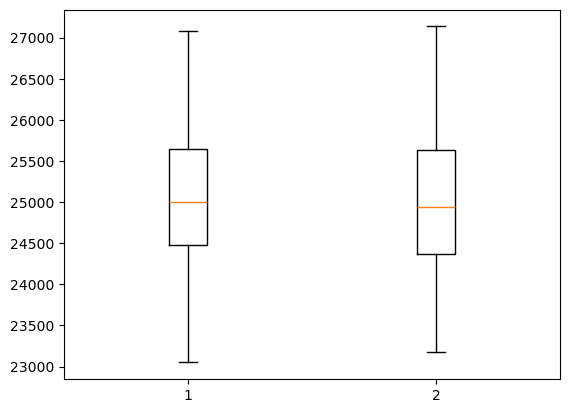

TtestResult(statistic=0.26574760444376755, pvalue=0.7907100974683923, df=198.0)


In [20]:
#10 difference
v5 = np.random.normal(25010, 1000, 100)
v6 = np.random.normal(25000, 1000, 100)
plt.boxplot([v5, v6])
plt.show()
t3 = stats.ttest_ind(v5, v6)
print(t3)

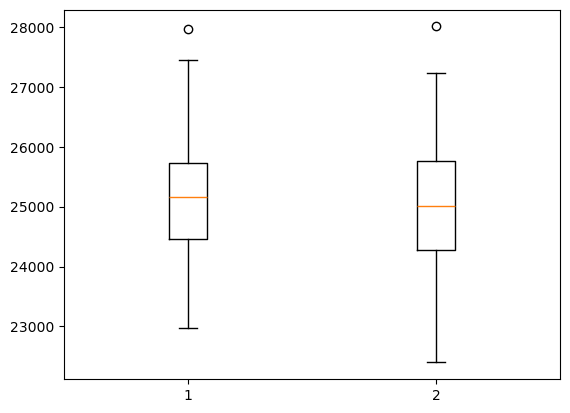

25112.587148308292
25081.689441715367
TtestResult(statistic=0.21637349750282853, pvalue=0.8289193834022669, df=198.0)


In [22]:
#0 difference
v7 = np.random.normal(25000, 1000, 100)
v8 = np.random.normal(25000, 1000, 100)
plt.boxplot([v7, v8])
plt.show()
print(np.mean(v7))
print(np.mean(v8))
t4 = stats.ttest_ind(v7, v8)
print(t4)

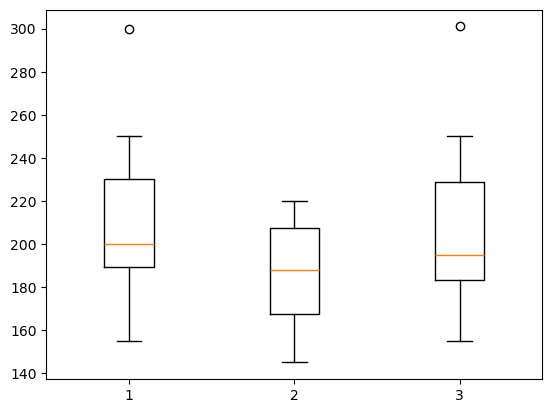

TtestResult(statistic=2.775412375008685, pvalue=0.03219144694665347, df=6)
TtestResult(statistic=1.821374794858189, pvalue=0.11839460264413576, df=6)
[24.14032055 23.20389365 25.60426831 27.70304145 27.18536054 20.59794278
 27.97687984 26.04984511 24.39005191 27.43977551 21.63230326 19.92814137
 21.9872334  24.45443187 23.78415884 26.4037353  28.92921767 24.07382513
 23.28772141 27.19422005 28.33846597 22.14100007 18.72957809 26.57121578
 25.72327103]
[24.59399083 23.65282947 26.23299587 28.5008919  26.80308824 23.31291324
 23.57815989 24.79537823 22.74350669 23.26293108 28.62797233 21.74308518
 26.24219361 22.26168495 23.39782421 24.40343104 26.58075628 19.88692297
 25.86337732 23.96164261 23.83171735 26.62241189 25.83658037 24.06337888
 26.62350182]
TtestResult(statistic=0.0, pvalue=1.0, df=24)
TtestResult(statistic=82.6894308342702, pvalue=1.1655481634385192e-109, df=123.0)
TtestResult(statistic=0.002691059555313968, pvalue=0.9978640009821937, df=48.0)


In [24]:
#Paired T Test used when samples don't change
#Sample pre-treatment is the same sample post-treatment
#Example: Group begins a diet program

before = np.array([200, 210, 199, 180, 250, 155, 300])
after1 = np.array([175, 205, 188, 160, 210, 145, 220])
after2 = np.array([190, 208, 195, 177, 250, 155, 301])
plt.boxplot([before, after1, after2])
plt.show()
ttest_before_after1 = stats.ttest_rel(before, after1)
print(ttest_before_after1)
ttest_before_after2 = stats.ttest_rel(before, after2)
print(ttest_before_after2)


#One sample t-test
#stats.ttest_1samp(sample, popmean)
moredata = np.random.normal(25, 3, 500)
moreS1 = np.random.choice(moredata, 25)
moreS2 = np.random.choice(moredata, 25)
print(moreS1)
mean_mores1 = np.mean(moreS1)
print(moreS2)
ttest_moreS1 = stats.ttest_1samp(moreS1, mean_mores1)
print(ttest_moreS1)

#Independent 2-group t-test
#stats.ttest_ind(sample1, sample2)
binvar = np.random.binomial(n=1, p=0.5, size=100)
ttest_moreS1_binvar = stats.ttest_ind(moreS1, binvar)
print(ttest_moreS1_binvar)

#Independent 2-group t-test
#stats.ttest_ind(sample1, sample2)
ttest_moreS1_moreS2 = stats.ttest_ind(moreS1, moreS2)
print(ttest_moreS1_moreS2)

In [26]:
#Testing for normality using Shapiro-Wilk Test
moreS1 = np.random.normal(100, 10, 100)
moreS2 = np.random.normal(100, 20, 100)
binvar = np.random.binomial(50, 0.2, 100)
poisvar = np.random.poisson(5, 100)

print(stats.shapiro(moreS1))  # normal
print(stats.shapiro(moreS2))  # normal
print(stats.shapiro(binvar))  # binomial
print(stats.shapiro(poisvar))  # poisson

ShapiroResult(statistic=0.9830327197101265, pvalue=0.2272824173050854)
ShapiroResult(statistic=0.9899422539630559, pvalue=0.6599246395240173)
ShapiroResult(statistic=0.9843896757272927, pvalue=0.28674617838878236)
ShapiroResult(statistic=0.9346460236293515, pvalue=9.224042998625168e-05)


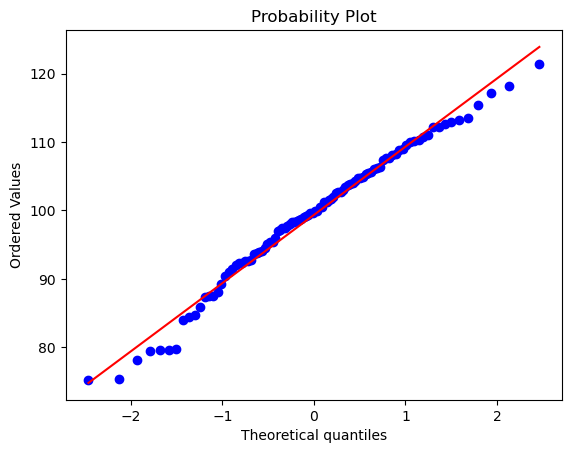

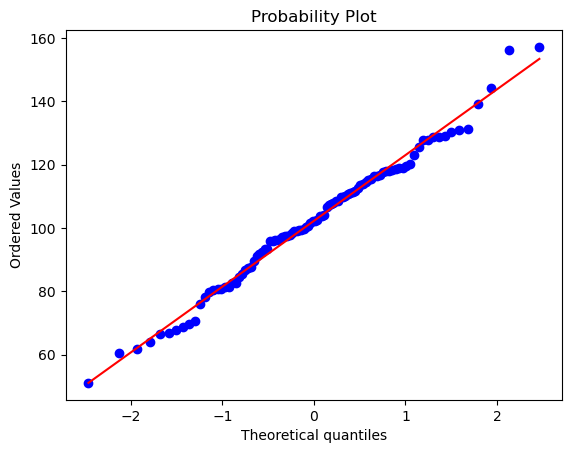

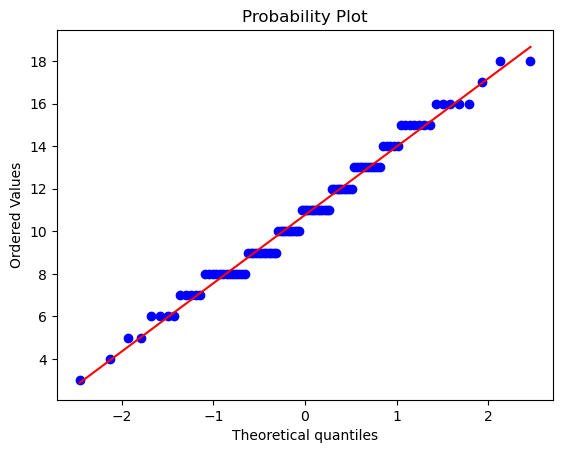

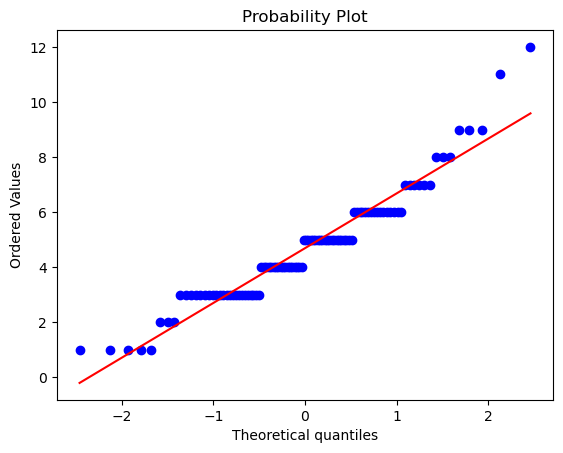

In [28]:
#Testing for normality using qq-plot
stats.probplot(moreS1, plot=plt)
plt.show()
stats.probplot(moreS2, plot=plt)
plt.show()
stats.probplot(binvar, plot=plt)
plt.show()
stats.probplot(poisvar, plot=plt)
plt.show()

In [67]:
#Proportions
#Single Sample

sample_proportion = 0.56
population_proportion = 0.35
n = 200
alpha = 0.05
cv = stats.norm.ppf(1-alpha)


def z_1sample_proportion(sample, population):
    z = (sample - population) /(np.sqrt((population * (1 - population))/n))
    print(z)

def z_test_1sample_proportion(sample, population, n, alpha, test):
    z = (sample - population) /(np.sqrt((population * (1 - population))/n))
    print(f"Z is equal to {z}")
    
    if test == "l":
        cv = stats.norm.ppf(alpha)
        print(f"CV is equal to {cv}")
        if z < cv:
            print("Reject the null")
        else:
            print("Fail to reject the null")
            
    elif test == "r":
        cv = stats.norm.ppf(1-alpha)
        print(f"CV is equal to {cv}")
        if z > cv:
            print("Reject the null")
        else:
            print("Fail to reject the null")
    else: 
        cv = abs(stats.norm.ppf(alpha/2))
        print(f"CV is equal to {cv}")
        if z > cv:
            print("Reject the null")
        else:
            print("Fail to reject the null")

    

#z_proportion(sample_proportion,population_proportion)
z_test_1sample_proportion(sample_proportion, population_proportion, 200, 0.05, "r")

Z is equal to 6.2264942599532525
CV is equal to 1.644853626951472
Reject the null
